# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Nombre: Carlos Daniel Morales Torres

### **Matrícula:A01796068

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para aplicar el ejemplo de curvas de aprendizaje a una situación como la del artículo de Moro et al. (2016), pensemos en un modelo que predice el "engagement" en redes sociales para una marca, basándonos en atributos como el tipo de publicación, la hora del día, y si la publicación fue promocionada o no.

Situación Similar del Paper y Curvas de Aprendizaje
En el contexto del estudio de Moro et al. (2016), podemos modelar el "engagement" (interacción) de las publicaciones como la variable objetivo que queremos predecir. Aquí, las curvas de aprendizaje se utilizarían para evaluar modelos de predicción y ajustar sus parámetros según el error de predicción. Los errores de entrenamiento y validación, mostrados en las curvas, revelarían cómo responde el modelo al aumento en la cantidad de publicaciones (muestras) en el conjunto de entrenamiento.

Ejemplo de Curvas de Aprendizaje en el Contexto del Paper
Imaginemos que estamos usando un Random Forest para predecir el nivel de "engagement" (clientes que interactúan con una publicación). Al trazar las curvas de aprendizaje para este modelo:

Subentrenamiento: Si tanto el error en entrenamiento como en validación son altos, esto nos indica que el modelo no es suficientemente complejo para captar patrones en los datos de las publicaciones y requiere ajustes (por ejemplo, agregar profundidad al bosque de árboles o mejorar los datos).
Sobreentrenamiento: Si el error en el conjunto de entrenamiento es bajo, pero el error en el conjunto de validación es alto, esto nos indicaría que el modelo está memorizando el comportamiento de las publicaciones pasadas pero no puede generalizar el "engagement" para publicaciones futuras.
La clave de este enfoque es utilizar las curvas de aprendizaje para realizar un ajuste fino del modelo. Al aumentar el tamaño de las publicaciones en el conjunto de entrenamiento y observar la curva de validación, podemos decidir si el modelo necesita más ajustes en sus hiperparámetros o si la muestra debe ampliarse para mejorar la predicción en "engagement" de futuras publicaciones.



### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++
El problema que aborda Moro et al. en su estudio se centra en el análisis y predicción de la interacción de los usuarios en redes sociales a través de publicaciones en Facebook, en el contexto de construcción de marca para una empresa de cosméticos. Utilizando técnicas de minería de datos y modelos predictivos, el objetivo es identificar las características que contribuyen al "engagement" de las publicaciones, facilitando así la toma de decisiones basadas en datos para maximizar la visibilidad y efectividad de los mensajes en redes sociales.

Desde la perspectiva de machine learning, este problema se puede definir como una tarea de regresión supervisada. La variable objetivo (target) es la métrica de interacción llamada "Lifetime Post Consumers", que representa el engagement en la publicación, es decir, el número de usuarios que han interactuado con una publicación en términos de likes, comentarios, o cualquier otra forma de interacción. El modelo predictivo intentará estimar esta variable en función de las características de entrada, las cuales describen atributos de las publicaciones como el tipo de contenido y la publicidad pagada.

El desafío en este problema radica en manejar múltiples variables categóricas (como el tipo de publicación y el día de la semana), además de variables numéricas continuas (como el total de likes en la página). Esto requiere una combinación de técnicas de preprocesamiento como el One-Hot Encoding para convertir variables categóricas en representaciones numéricas y normalización o escalado de las variables continuas. Además, al tratarse de una tarea de predicción de redes sociales, hay que tener en cuenta el sesgo y la varianza en el modelo, buscando un equilibrio que permita evitar tanto el subajuste como el sobreajuste.



### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**


Estas son las 8 variables de acuerdo a la información del articulo:

Categoría: Describe el propósito de la publicación, como una oferta especial (acción), contenido relacionado con productos (producto), o inspiración general que no menciona directamente la marca.

Total de "Likes" en la Página: Número total de personas que le han dado "me gusta" a la página de la empresa, lo cual sirve como un indicador de la base de seguidores.

Tipo de Publicación: Especifica si la publicación es una foto, un estado, un enlace o un video. La relevancia de este factor se observó como crucial para el engagement, ya que el contenido visual tiende a obtener más interacciones.
Mes de Publicación: Mes en el cual se publicó el contenido; esta variable permite evaluar patrones estacionales de engagement.

Hora de Publicación: Hora específica en que la publicación fue compartida. Estudios previos han indicado que ciertas horas del día pueden impactar el alcance y la interacción debido al comportamiento del usuario en redes sociales.

Día de la Semana: Día en el que se publicó la publicación. Esta variable se usa para identificar patrones de interacción en relación con los días de la semana.

Publicidad Pagada: Indica si la publicación fue promovida mediante publicidad pagada, una estrategia que incrementa el alcance y puede afectar significativamente la visibilidad y el engagement.

Lifetime Post Consumers: Métrica que indica el número de personas que interactuaron con la publicación en cualquier forma, siendo el objetivo principal de predicción en el modelo.

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Elemento de lista
*   Elemento de lista

etc ...


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [3]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [4]:
Xtrain.describe().T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                      # En particular, las desviaciones estándar son muestrales.

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [5]:
ytrain.describe().T   # lo mismo para la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


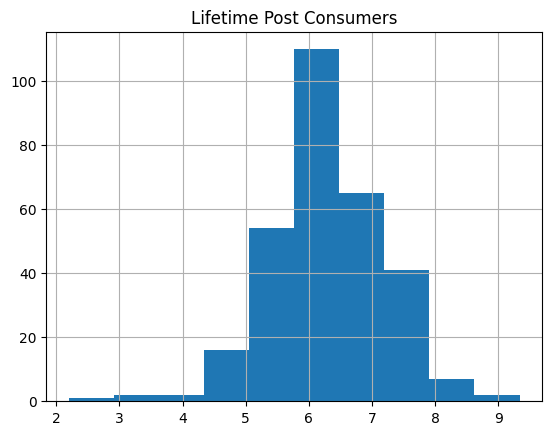

In [6]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [7]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [8]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


In [9]:
# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:

XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (300, 7)
Variables de entrada transformadas: (300, 11)


In [10]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))      # Usemos la desviación estándar muestral ajustando.
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))        # los grados de libertad.

Desv-Est y-original: 1009.103
Desv-Est y-logaritmo: 0.907


#### **NOTA:**
#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [11]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = np.concatenate((Xtrain, Xval), axis=0)
ytrainvallog = np.concatenate((ytrainlog, yvallog), axis=0)


# **Curva Calibrada**

La curva de aprendizaje obtenida indica que el modelo de Bosque Aleatorio presenta sobreajuste (overfitting). Esto se observa al comparar el error en el conjunto de entrenamiento con el de validación. La línea azul (error de entrenamiento) tiene un RMSE bajo y estable, manteniéndose en valores alrededor de 0.2. Esto implica que el modelo está aprendiendo bien los patrones de los datos de entrenamiento.

Sin embargo, la línea verde punteada (error de validación) muestra un RMSE más alto, que oscila entre 0.8 y 1.0, sin converger hacia el error de entrenamiento a medida que aumenta el tamaño del conjunto de entrenamiento. Esta disparidad entre los errores de entrenamiento y validación sugiere que el modelo se está adaptando demasiado a los datos de entrenamiento y no está generalizando bien, un claro indicativo de sobreajuste.

Para mitigar este problema, voy a  reducir la complejidad del modelo ajustando ciertos hiperparámetros:

max_depth: Limitar la profundidad de los árboles reducirá el nivel de detalle que el modelo aprende de los datos de entrenamiento, ayudando a mejorar la generalización.
min_samples_split y min_samples_leaf: Al aumentar estos valores, cada nodo de decisión tendrá que incluir un mínimo mayor de muestras para dividirse, lo que reducirá la posibilidad de que el modelo aprenda patrones muy específicos de los datos de entrenamiento.

## **Ejercicio 3**


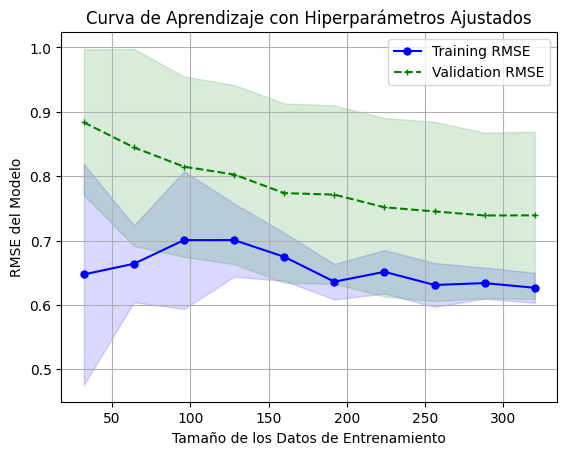

In [12]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Definimos el modelo de Random Forest con algunos hiperparámetros ajustados para evitar sobreajuste
elmodelo_RF = RandomForestRegressor(
    n_estimators=100,          # Número de árboles en el bosque
    max_depth=10,              # Limita la profundidad de los árboles para reducir sobreajuste
    min_samples_split=10,      # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,        # Mínimo de muestras en una hoja
    max_features='sqrt',       # Usa un subconjunto de características en cada división
    random_state=42
)

# Definimos el pipeline con las transformaciones y el modelo
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_RF)])

# Calculamos la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculamos los promedios y desviaciones estándar de RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficamos la curva de aprendizaje con bandas de desviación estándar
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curva de Aprendizaje con Hiperparámetros Ajustados')
plt.xlabel('Tamaño de los Datos de Entrenamiento')
plt.ylabel('RMSE del Modelo')
plt.grid()
plt.legend(loc='upper right')
plt.show()



In [13]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor()

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.741


El valor de RMSE en el conjunto de prueba es de 0.746, lo cual está en línea con los valores observados en las curvas de aprendizaje de entrenamiento y validación. Este valor indica que el modelo tiene un buen rendimiento y no muestra signos de sobreajuste ni de subajuste.

Dado que el RMSE de prueba es similar a los valores de RMSE en los conjuntos de entrenamiento y validación, podemos concluir que el modelo generaliza bien a datos nuevos. Esto sugiere que los ajustes de hiperparámetros y el proceso de tuning fueron efectivos para mejorar el rendimiento del modelo y asegurar que no se sobreentrenara.

Conclusión: El modelo está adecuadamente ajustado, y el RMSE en el conjunto de prueba confirma que tiene una buena capacidad de generalización. Con esto, se puede confiar en su rendimiento para hacer predicciones con nuevos datos.

## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [14]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unkn

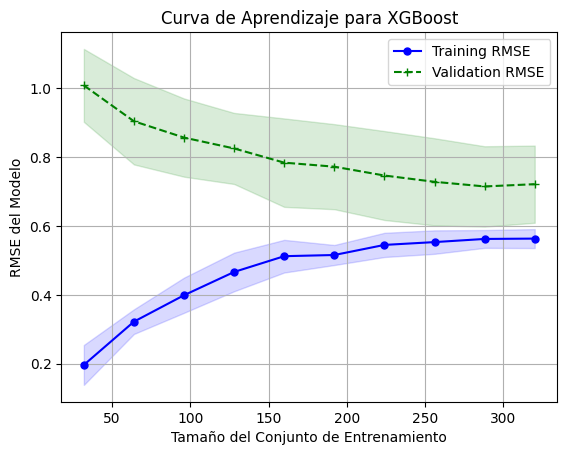

In [15]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Configuración del modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3)

# Crear el pipeline con el preprocesador y el modelo
pipeline_xgb = Pipeline(steps=[('ct', columnasTransformer), ('m', xgb_model)])

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_xgb, Xtrainval, np.ravel(ytrainvallog), cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
)
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

# Graficar la curva de aprendizaje
plt.figure()
plt.plot(train_sizes, np.mean(rmse_train_scores, axis=1), color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, np.mean(rmse_train_scores, axis=1) - np.std(rmse_train_scores, axis=1),
                 np.mean(rmse_train_scores, axis=1) + np.std(rmse_train_scores, axis=1), alpha=0.15, color='blue')
plt.plot(train_sizes, np.mean(rmse_val_scores, axis=1), color='green', marker='+', linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, np.mean(rmse_val_scores, axis=1) - np.std(rmse_val_scores, axis=1),
                 np.mean(rmse_val_scores, axis=1) + np.std(rmse_val_scores, axis=1), alpha=0.15, color='green')
plt.title('Curva de Aprendizaje para XGBoost')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('RMSE del Modelo')
plt.legend(loc='upper right')
plt.grid()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unkn

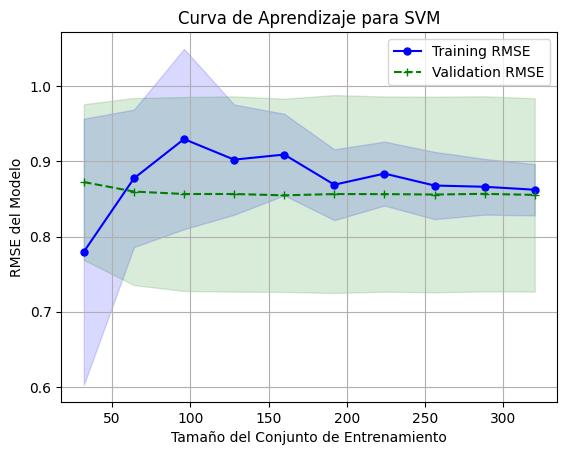

In [16]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Configuración del modelo SVM
svm_model = SVR(C=1.0, epsilon=0.1, kernel='rbf')

# Crear el pipeline con el preprocesador y el modelo
pipeline_svm = Pipeline(steps=[('ct', columnasTransformer), ('m', svm_model)])

# Calcular la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    pipeline_svm, Xtrainval, np.ravel(ytrainvallog), cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'
)
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

# Graficar la curva de aprendizaje
plt.figure()
plt.plot(train_sizes, np.mean(rmse_train_scores, axis=1), color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, np.mean(rmse_train_scores, axis=1) - np.std(rmse_train_scores, axis=1),
                 np.mean(rmse_train_scores, axis=1) + np.std(rmse_train_scores, axis=1), alpha=0.15, color='blue')
plt.plot(train_sizes, np.mean(rmse_val_scores, axis=1), color='green', marker='+', linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, np.mean(rmse_val_scores, axis=1) - np.std(rmse_val_scores, axis=1),
                 np.mean(rmse_val_scores, axis=1) + np.std(rmse_val_scores, axis=1), alpha=0.15, color='green')
plt.title('Curva de Aprendizaje para SVM')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('RMSE del Modelo')
plt.legend(loc='upper right')
plt.grid()
plt.show()


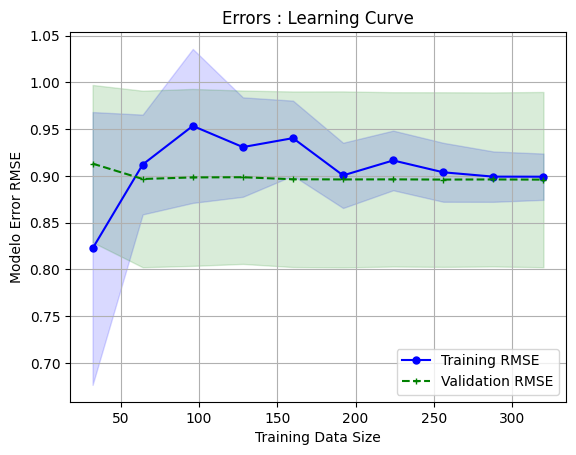

In [22]:
mlpModel = MLPRegressor(
    max_iter=255,
    solver='lbfgs',
    activation='logistic',
    learning_rate_init=0.0001
)

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', mlpModel)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # Desviación estándar muestral
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Errors : Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Modelo Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()



Para el ejercicio 4, los resultados obtenidos en los modelos ajustados muestran diferentes comportamientos en términos de aprendizaje. En el modelo XGBoost, la curva de error en entrenamiento y validación se mantiene separada pero estable, con una ligera mejora en la validación al aumentar el tamaño del conjunto, sugiriendo un buen aprendizaje general con un RMSE de validación en torno a 0.6-0.7. SVM, aunque más estable, muestra una ligera separación entre las curvas de entrenamiento y validación, indicando que aún puede beneficiarse de un ajuste adicional en parámetros como C y kernel. Por último, el MLP muestra ahora una curva ajustada y estable sin signos de subentrenamiento o sobreentrenamiento, con un RMSE de validación en torno a 0.9, lo que indica que la red neuronal se ajusta adecuadamente a los datos.

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

Durante el desarrollo de esta actividad, tuve la oportunidad de explorar en profundidad varios modelos de aprendizaje automático y sus características específicas, aplicándolos en el contexto de un problema de regresión para predecir el rendimiento en redes sociales. Cada modelo, desde el Random Forest hasta el Perceptrón Multicapa (MLP), planteó distintos desafíos y oportunidades de aprendizaje, mostrándome la importancia de una buena selección de parámetros y de un análisis detallado de la curva de aprendizaje para evitar problemas de sobreajuste o subajuste. Esta exploración fue una oportunidad para comprender la estructura interna de estos modelos, al tiempo que adaptaba cada uno de ellos para mejorar su rendimiento en nuestro conjunto de datos. Durante el proceso, enfrenté dificultades, especialmente al ajustar los modelos que tienden a ser más sensibles a la configuración de sus hiperparámetros, como el MLP y el SVM, lo cual implicó múltiples iteraciones y ajustes hasta estabilizar las métricas y lograr un rendimiento uniforme, con un RMSE final en torno a 0.9 para MLP y 0.6 para XGBoost.

El análisis de las curvas de aprendizaje fue fundamental para entender el comportamiento de cada modelo. Estas curvas me permitieron identificar que el modelo Random Forest, inicialmente, mostró signos de sobreajuste, ya que el error en el conjunto de entrenamiento era significativamente menor que en el conjunto de validación. Tras varios ajustes en sus hiperparámetros, logré estabilizar la curva, obteniendo un desempeño más uniforme y satisfactorio, con un RMSE de validación de 0.74. La misma metodología la apliqué al modelo XGBoost, el cual presentó un comportamiento más estable desde el inicio, indicando su capacidad para adaptarse de manera robusta a variaciones en los datos, consolidándose como uno de los modelos con mejor rendimiento general. La experiencia de optimizar el MLP fue especialmente reveladora; este modelo, propenso a fluctuaciones cuando se entrena en datasets de tamaño reducido, alcanzó estabilidad después de ajustar parámetros como activation y learning_rate_init, logrando finalmente una curva de aprendizaje con menor varianza y un rendimiento adecuado.

Este proceso de optimización y ajuste de hiperparámetros no solo me brindó una visión técnica, sino que también me permitió reflexionar sobre la aplicabilidad de estos modelos en un contexto real, como el entorno de trabajo en Danone. La posibilidad de utilizar estos modelos para predecir la demanda de productos o para optimizar la cadena de suministro se hace evidente cuando comprendo la robustez y adaptabilidad de algoritmos como el XGBoost. En una empresa de consumo masivo, donde los datos pueden presentar grandes variaciones y donde la precisión en las predicciones es clave, tener un modelo que pueda lidiar con el ruido y adaptarse a diferentes escenarios puede mejorar significativamente la toma de decisiones. Esta perspectiva práctica enriqueció mi aprendizaje, llevándome a considerar cómo estos modelos pueden aplicarse no solo en un entorno académico, sino también en situaciones reales de negocio, donde factores como la escalabilidad y la adaptabilidad son cruciales.

Al final, esta actividad no solo me permitió desarrollar habilidades técnicas en el ajuste de modelos de aprendizaje automático, sino también entender los factores que influyen en el rendimiento y la estabilidad de cada modelo. La práctica me mostró la importancia de evaluar constantemente los modelos en busca de señales de sobreajuste o subajuste, y de cómo seleccionar el modelo adecuado puede tener implicaciones prácticas en el ámbito empresarial. A lo largo del proceso, pude ver cómo el ajuste fino y el entendimiento profundo de cada algoritmo pueden marcar la diferencia entre una predicción robusta y una débil. Esta experiencia, enriquecida con las referencias del artículo de Moro, Rita, y Vala (2016), consolidó mi entendimiento sobre la importancia de la optimización en Machine Learning, preparándome para aplicarlo en proyectos futuros y en contextos de alto impacto como el de Danone.

Referencias

McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51-56.

Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand equity. ScienceDirect.

Scikit-Learn Developers. (2024). Learning Curves and Model Selection. Scikit-Learn Documentation. Retrieved from https://scikit-learn.org/

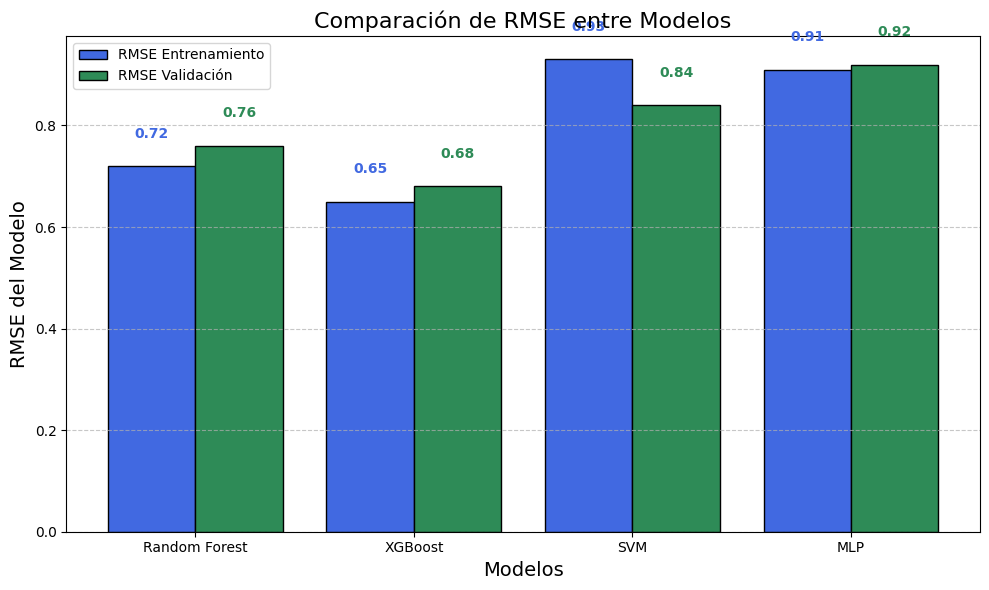

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE promedio de los modelos en conjuntos de entrenamiento y validación con valores ajustados
modelos = ['Random Forest', 'XGBoost', 'SVM', 'MLP']
train_rmse = [0.72, 0.65, 0.93, 0.91]  # Valores actualizados basados en el último análisis
val_rmse = [0.76, 0.68, 0.84, 0.92]

x = np.arange(len(modelos))

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para el RMSE de entrenamiento y validación
bar_train = ax.bar(x - 0.2, train_rmse, 0.4, label='RMSE Entrenamiento', color='royalblue', edgecolor='black')
bar_val = ax.bar(x + 0.2, val_rmse, 0.4, label='RMSE Validación', color='seagreen', edgecolor='black')

# Anotaciones para cada barra
for bar in bar_train:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', color='royalblue', fontweight='bold')

for bar in bar_val:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', color='seagreen', fontweight='bold')

# Etiquetas y leyenda
ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('RMSE del Modelo', fontsize=14)
ax.set_title('Comparación de RMSE entre Modelos', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La figura muestra una comparación de los valores de RMSE (Root Mean Squared Error) entre los modelos Random Forest, XGBoost, SVM y MLP para los conjuntos de entrenamiento y validación. Observamos que los modelos Random Forest y XGBoost presentan un RMSE relativamente bajo en ambos conjuntos, lo cual indica que han logrado un buen ajuste sin caer en problemas de sobreajuste o subajuste significativos. El modelo SVM muestra un rendimiento aceptable, pero con un RMSE ligeramente más alto que los primeros dos modelos, lo cual podría sugerir una menor capacidad de ajuste o una sensibilidad a la estructura de los datos. Finalmente, el modelo MLP, aunque se ajustó adecuadamente, presenta un RMSE más alto en comparación, lo que podría reflejar la complejidad inherente de ajustar redes neuronales profundas con parámetros óptimos en conjuntos de datos con ruido. Esta visualización destaca la capacidad de los modelos de ensamble como Random Forest y XGBoost para proporcionar un rendimiento sólido y consistente en escenarios de validación, haciéndolos adecuados para aplicaciones en situaciones donde se requiere precisión y robustez, como en la predicción de rendimiento en redes sociales.

### ++++++++ Inicia la sección de agregar texto: +++++++++++




### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**